In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("..\\data\\InflationDataPerCountry.csv")

In [3]:
### Grabbing the US Data from the file
us_df = data[data['Country Name'] == 'United States']
us_df = us_df.drop(columns=['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name']).T.rename(columns={
    251: "inflation_rate"
})
us_df.index = us_df.index.astype(int)
us_df.index.rename('Year', inplace=True)

In [12]:
### Load congressional data
congress_data = pd.read_csv('..\\data\\GovernmentDataPerYear.csv', delimiter='\t', index_col='Year')
congress_data

,Name,Party,Congress Maj Party,Congress Maj Num,Congress Min Party,Congress Min Num,Other Num,Congress Session,Congress Percent Maj
Year,,,,,,,,,
1960,Eisenhower,R,D,232,R,203,0,85,0.53
1961,Kennedy,D,D,282,R,153,1,86,0.65
1962,Kennedy,D,D,282,R,153,1,86,0.65
1963,Kennedy,D,D,264,R,173,0,87,0.60
1964,Johnson,D,D,264,R,173,0,87,0.60
...,...,...,...,...,...,...,...,...,...
2017,Trump,R,R,247,D,288,0,114,0.46
2018,Trump,R,R,247,D,288,0,114,0.46
2019,Trump,R,R,241,D,194,0,115,0.55


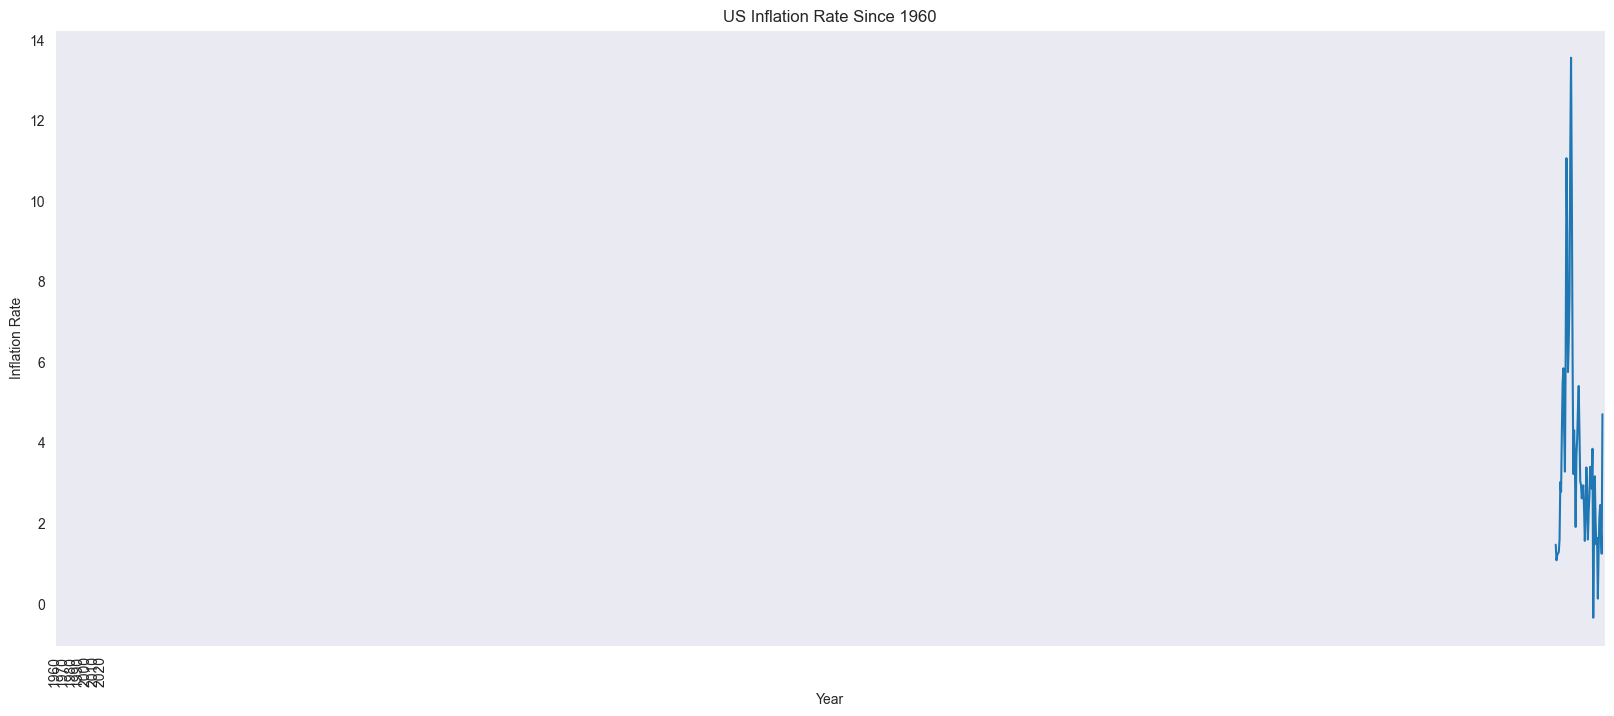

In [11]:
sns.set_style("dark")
plt.figure(figsize=(20,8))
plot = sns.lineplot(x=us_df.index, y=us_df.inflation_rate)
plot.set(title="US Inflation Rate Since 1960", xlabel='Year', ylabel='Inflation Rate')
x_lap = [0,10,20,30,40,50,60]
y_lap = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(x_lap,y_lap, rotation = 'vertical');

In [6]:
### Process to make it per year
cpi_df = pd.read_csv("..\\data\\cpiDataPerMonth.csv", parse_dates=[0])
cpi_df['MONTH'] = cpi_df['DATE'].dt.month
cpi_df = cpi_df[cpi_df['MONTH'] == 12]
cpi_df['YEAR'] = cpi_df['DATE'].dt.year
cpi_df = cpi_df.drop(columns=['DATE', 'MONTH'])
cpi_df = cpi_df.reset_index(drop=True)
cpi_df = cpi_df.set_index('YEAR')
cpi_df = cpi_df.rename(columns={
    'USACPIALLMINMEI' : 'CPI'
})
cpi_df.index.rename('Year', inplace=True)

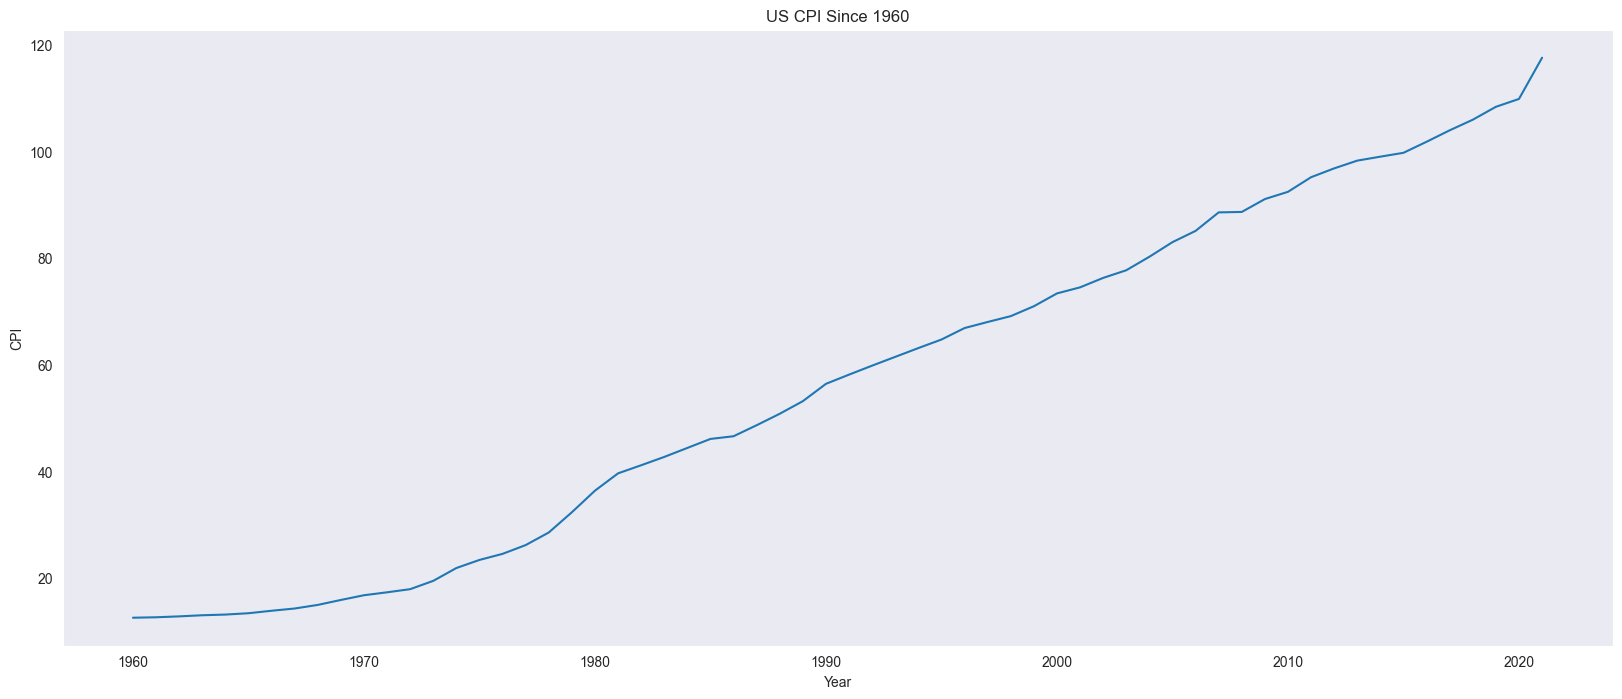

In [7]:
### EDA Plot
sns.set_style("dark")
plt.figure(figsize=(20,8))
plot = sns.lineplot(x=cpi_df.index, y=cpi_df.CPI)
plot.set(title="US CPI Since 1960", xlabel='Year', ylabel='CPI');

In [8]:
from sklearn.preprocessing import OneHotEncoder
### Create the full df
full_df = us_df.join(congress_data).join(cpi_df)
### One Hot encode party stuff
ohe = OneHotEncoder()
ohe_fit = ohe.fit_transform(full_df[['Party', ' Congress Maj Party']])
ohe_fit = pd.DataFrame(ohe_fit.toarray()).rename(columns={
    0: "DemPresParty",
    1: 'RepPresParty',
    2: 'DemCongParty',
    3: 'RepCongParty'
})

ohe_fit = ohe_fit.apply(lambda x: x.astype(int))
ohe_fit['Year'] = list(range(1960, 2022))
ohe_fit.set_index('Year', inplace=True)
sal_df = pd.read_csv('..\\data\\averageSalary.csv', index_col='Year')
### Final Data Preprocessing Step
full_df = full_df.drop(columns=['Name', 'Party', ' Congress Maj Party', 'Congress Min Party']).join(ohe_fit).join(sal_df)
full_df

,inflation_rate,Congress Maj Num,Congress Min Num,Other Num,Congress Session,Congress Percent Maj,CPI,DemPresParty,RepPresParty,DemCongParty,RepCongParty,Average Salary
Year,,,,,,,,,,,,
1960,1.457976,232,203,0,85,0.53,12.572938,0,1,1,0,4007.12
1961,1.070724,282,153,1,86,0.65,12.657320,1,0,1,0,4086.76
1962,1.198773,282,153,1,86,0.65,12.826084,1,0,1,0,4291.40
1963,1.239669,264,173,0,87,0.60,13.037040,1,0,1,0,4396.64
1964,1.278912,264,173,0,87,0.60,13.163613,1,0,1,0,4576.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2.130110,247,288,0,114,0.46,104.011105,0,1,0,1,50321.89
2018,2.442583,247,288,0,114,0.46,105.997882,0,1,0,1,52145.80
2019,1.812210,241,194,0,115,0.55,108.420071,0,1,0,1,54099.99
